ckqhsqp2ij8q2f9vifu0
JobStatus.QUEUED
        ┌───┐      ░ ┌─┐   
   Q_0: ┤ H ├──■───░─┤M├───
        ├───┤┌─┴─┐ ░ └╥┘┌─┐
   Q_1: ┤ X ├┤ X ├─░──╫─┤M├
        └───┘└───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 


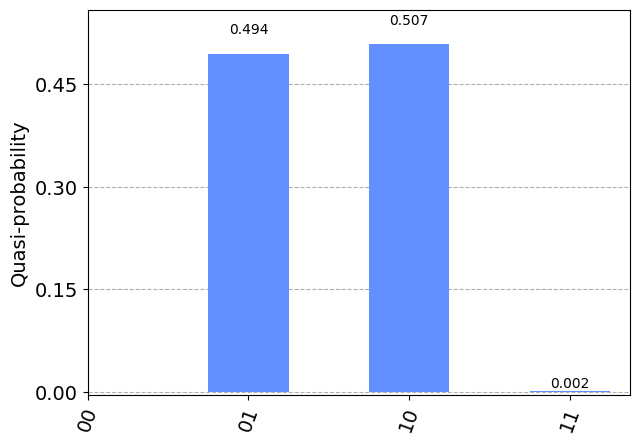

In [131]:
#Imports
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Session, Options
from qiskit import QuantumCircuit, execute
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Estimator, Options
from qiskit.visualization import plot_distribution

#Cloud configuration
service = QiskitRuntimeService(channel="ibm_cloud")
service.backends()
service.backends(simulator=False, operational=True, min_num_qubits=5)
#backend = service.backend('ibmq_qasm_simulator') # IBM's Quantum Simulator
backend = service.backend('ibm_brisbane') # IBM's Quantum computer

#Quantum program
q = QuantumRegister(2,'Q') # 2 Qubit initialization
circuit = QuantumCircuit(q) 
circuit.h(q[0]) # Hadamard gate puts the first qubit in the state of superposition
circuit.x(q[1]) # X gate is the NOT gate. It flips the second qubit. If this line is removed the end result will be the entanglement in 00 + 11 states.
circuit.cnot(q[0],q[1]) # CNOT gate flips the second bit if the first is 1 else leaves it alone
circuit.measure_all() # Measurement

#Job execution
options = Options()
options.execution.shots=1024
with Session(backend=backend) as session:
    sampler = Sampler(circuit, backend , options=options)
    job = sampler.run(circuit)
    print(job.job_id())
    print(job.status())
    results = job.result()
    session.close() # Closes the session

#Display results
print(circuit)
plot_distribution(results.quasi_dists[0].binary_probabilities())